In [16]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt
import geopy.distance

In [160]:
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [3]:
with open('D:/Jupyter Files Directory/faulty run.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

In [4]:
gpx

GPX(tracks=[GPXTrack(name='Morning Run', segments=[GPXTrackSegment(points=[...])])])

In [5]:
gpx.get_track_points_no()

1487

In [81]:
gpx.tracks[0].segments[0].points[0]

GPXTrackPoint(52.009513, 4.371311, elevation=1.0, time=datetime.datetime(2022, 10, 11, 5, 36, 35, tzinfo=SimpleTZ("Z")))

In [105]:
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation,
                'time':point.time
            })

In [106]:
route_info

[{'latitude': 52.009513,
  'longitude': 4.371311,
  'elevation': 1.0,
  'time': datetime.datetime(2022, 10, 11, 5, 36, 35, tzinfo=SimpleTZ("Z"))},
 {'latitude': 52.009499,
  'longitude': 4.371282,
  'elevation': 1.0,
  'time': datetime.datetime(2022, 10, 11, 5, 36, 36, tzinfo=SimpleTZ("Z"))},
 {'latitude': 52.009501,
  'longitude': 4.371266,
  'elevation': 1.0,
  'time': datetime.datetime(2022, 10, 11, 5, 36, 37, tzinfo=SimpleTZ("Z"))},
 {'latitude': 52.009503,
  'longitude': 4.37125,
  'elevation': 1.0,
  'time': datetime.datetime(2022, 10, 11, 5, 36, 38, tzinfo=SimpleTZ("Z"))},
 {'latitude': 52.009526,
  'longitude': 4.371225,
  'elevation': 1.0,
  'time': datetime.datetime(2022, 10, 11, 5, 36, 40, tzinfo=SimpleTZ("Z"))},
 {'latitude': 52.00954,
  'longitude': 4.371213,
  'elevation': 1.0,
  'time': datetime.datetime(2022, 10, 11, 5, 36, 41, tzinfo=SimpleTZ("Z"))},
 {'latitude': 52.009547,
  'longitude': 4.371187,
  'elevation': 1.0,
  'time': datetime.datetime(2022, 10, 11, 5, 36, 4

In [130]:
route_df = pd.DataFrame(route_info)
route_df[:5]

,latitude,longitude,elevation,time
0,52.009513,4.371311,1.0,2022-10-11 05:36:35+00:00
1,52.009499,4.371282,1.0,2022-10-11 05:36:36+00:00
2,52.009501,4.371266,1.0,2022-10-11 05:36:37+00:00
3,52.009503,4.371250,1.0,2022-10-11 05:36:38+00:00
4,52.009526,4.371225,1.0,2022-10-11 05:36:40+00:00


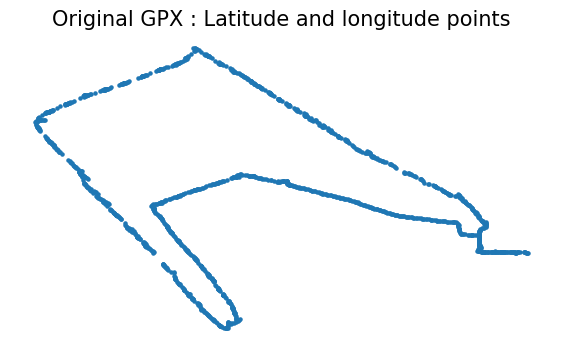

In [165]:
plt.figure(figsize=(7, 4))
plt.scatter(route_df['longitude'], route_df['latitude'],s=5)
plt.title('Original GPX : Latitude and longitude points', size=15)
plt.axis('off');

In [131]:
dist_list=[0]
time_list=[0]
for i in range(1,1487):
    coord1=(route_df.iloc[i-1,0],route_df.iloc[i-1,1])
    coord2=(route_df.iloc[i,0],route_df.iloc[i,1])
    dist=geopy.distance.geodesic(coord1, coord2).m
    dist_list.append(dist)
    time_list.append((route_df.iloc[i,3]-route_df.iloc[i-1,3]).total_seconds())
    
    
    
route_df['time_sec']=time_list    
route_df['distance']=   dist_list
route_df['speed']=route_df['distance']/route_df['time_sec']
route_df['distance'] = route_df['distance'].fillna(0)
route_df['speed'] = route_df['speed'].fillna(0)

In [150]:
route_df.head()

,latitude,longitude,elevation,time,time_sec,distance,speed
0,52.009513,4.371311,1.0,2022-10-11 05:36:35+00:00,0.0,0.000000,0.000000
1,52.009499,4.371282,1.0,2022-10-11 05:36:36+00:00,1.0,2.528163,2.528163
2,52.009501,4.371266,1.0,2022-10-11 05:36:37+00:00,1.0,1.120927,1.120927
3,52.009503,4.371250,1.0,2022-10-11 05:36:38+00:00,1.0,1.120927,1.120927
4,52.009526,4.371225,1.0,2022-10-11 05:36:40+00:00,2.0,3.081547,1.540774


In [132]:
sum(route_df['distance'])/1000

6.602401315184216

GPX says that I ran 6.6km. But in reality it was 4.91 km. 



My pace for the run was not more than  5:50min/km. 

So that is not more than 2.86m/s. 


So this function removes speed more than the specified speed and gives the dataframe with the remaining lat-lons.

In [152]:

def clean_gpx(speed):
    route_clean1_df=route_df.loc[(route_df["speed"] < speed)].reset_index(drop=True)
    dist_list=[0]
    time_list=[0]
    for i in range(1,631):
        coord1=(route_clean1_df.iloc[i-1,0],route_clean1_df.iloc[i-1,1])
        coord2=(route_clean1_df.iloc[i,0],route_clean1_df.iloc[i,1])
        dist=geopy.distance.geodesic(coord1, coord2).m
        dist_list.append(dist)
        time_list.append((route_clean1_df.iloc[i,3]-route_clean1_df.iloc[i-1,3]).total_seconds())
    route_clean1_df['time_sec_clean']=time_list    
    route_clean1_df['distance_clean']=dist_list

    route_clean1_df['time_sec_clean'] = route_clean1_df['time_sec_clean'].fillna(0)
    route_clean1_df['distance_clean'] = route_clean1_df['distance_clean'].fillna(0)

    
    return route_clean1_df

In [153]:
clean_gpx(2.86)

,latitude,longitude,elevation,time,time_sec,distance,speed,time_sec_clean,distance_clean
0,52.009513,4.371311,1.0,2022-10-11 05:36:35+00:00,0.0,0.000000,0.000000,0.0,0.000000
1,52.009499,4.371282,1.0,2022-10-11 05:36:36+00:00,1.0,2.528163,2.528163,1.0,2.528163
2,52.009501,4.371266,1.0,2022-10-11 05:36:37+00:00,1.0,1.120927,1.120927,1.0,1.120927
3,52.009503,4.371250,1.0,2022-10-11 05:36:38+00:00,1.0,1.120927,1.120927,1.0,1.120927
4,52.009526,4.371225,1.0,2022-10-11 05:36:40+00:00,2.0,3.081547,1.540774,2.0,3.081547
...,...,...,...,...,...,...,...,...,...
626,52.009552,4.370486,0.9,2022-10-11 06:07:59+00:00,2.0,5.533492,2.766746,2.0,5.533492
627,52.009545,4.370440,0.9,2022-10-11 06:08:01+00:00,2.0,3.253132,1.626566,2.0,3.253132
628,52.009520,4.370836,0.9,2022-10-11 06:08:08+00:00,2.0,3.988692,1.994346,7.0,27.332634
629,52.009519,4.370884,0.9,2022-10-11 06:08:10+00:00,1.0,0.360898,0.360898,2.0,3.297723


In [155]:
sum(clean_gpx(2.86)['distance_clean'])/1000

5.37848288272255

The cleaning of error prone lat-lons has reduced the distance closer toward reality.

The original GPX has a error of 34%. The modified GPX has a error of 9%.

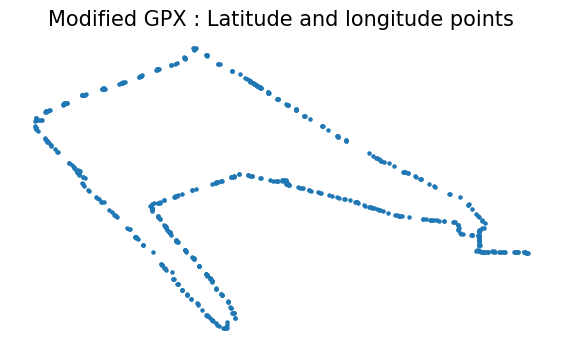

In [166]:
plt.figure(figsize=(7, 4))
plt.scatter(route_clean1_df['longitude'], route_clean1_df['latitude'],s=5,colour=')
plt.title('Modified GPX : Latitude and longitude points', size=15)
plt.axis('off');